This notebook replicates the code for Lesson 4 of QF607

# 👉 <a id = "top">Table of Contents</a> 👈 

# [1. Root Finding](#p1)

# [2. Bisection Method](#p2)

# [3. Secant Method](#p3)

# [4. False Position Method](#p4)

# [5. Brent Method](#5)

# [6. Volatility Smile](#6)

# [7. Implied Volatility Surface](#7)

In [1]:
import math
import time
import numpy
from binomial import *
from scipy import optimize

from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import bisect
from scipy import optimize

from binomial import PayoffType, cnorm

# <a id = "p1">1.</a>  <font color = "green"> Root Finding </font>  [back to table of contents](#top)

In [2]:
def rootBracketing(f, a, b, maxIter, factor):
    for k in range(maxIter):
        if f(a) * f(b) < 0:
            return (a, b)
        if abs(f(a)) < abs(f(b)):
            a += factor * (a-b)  # if f(a) is closer to 0, change a
        else:
            b += factor * (b-a)  # if f(b) is closer to 0, change b
    return (a, b)

In [3]:
def testRootBracketin():
    foo = lambda x : math.exp(x) - 5
    a = 3.4
    b = 5.78
    (a_, b_) = rootBracketing(foo, a, b, 50, 1.6)
    print("brackets:", a_, b_)

In [4]:
if __name__ == "__main__":
    testRootBracketin()

brackets: -0.4080000000000008 5.78


# <a id = "p2">2.</a>  <font color = "green"> Bisection Method </font>  [back to table of contents](#top)

In [5]:
def bisect_function(f, a, b, tol):
    assert(a < b and f(a) * f(b) < 0)
    c = (a+b) / 2
    while (b-a)/2 > tol:
        print("(a, b) = (", a, ",", b, ")")
        c = (a+b)/2
        if abs(f(c)) < tol:
            return c
        else:
            if f(a) * f(c) < 0:
                b = c
            else:
                a = c
    return c

In [6]:
def testBisection():
    # bs price for 10% vol
    price = bsPrice(S=100, r=0.02, vol=0.1, T=1.0, strike=90, payoffType=PayoffType.Call)
    f = lambda vol: (bsPrice(100, 0.02, vol, 1.0, 90, PayoffType.Call) - price)
    a, b = 0.0001, 0.5
    iv = bisect_function(f, a, b, 1e-6)
    print("Method bisection: implied vol = ", iv)

In [7]:
if __name__ == "__main__":
    testBisection()

(a, b) = ( 0.0001 , 0.5 )
(a, b) = ( 0.0001 , 0.25005 )
(a, b) = ( 0.0001 , 0.125075 )
(a, b) = ( 0.06258749999999999 , 0.125075 )
(a, b) = ( 0.09383124999999999 , 0.125075 )
(a, b) = ( 0.09383124999999999 , 0.10945312499999998 )
(a, b) = ( 0.09383124999999999 , 0.10164218749999998 )
(a, b) = ( 0.09773671874999998 , 0.10164218749999998 )
(a, b) = ( 0.09968945312499998 , 0.10164218749999998 )
(a, b) = ( 0.09968945312499998 , 0.10066582031249999 )
(a, b) = ( 0.09968945312499998 , 0.10017763671874999 )
(a, b) = ( 0.09993354492187498 , 0.10017763671874999 )
(a, b) = ( 0.09993354492187498 , 0.10005559082031248 )
(a, b) = ( 0.09999456787109373 , 0.10005559082031248 )
(a, b) = ( 0.09999456787109373 , 0.10002507934570311 )
(a, b) = ( 0.09999456787109373 , 0.10000982360839841 )
(a, b) = ( 0.09999456787109373 , 0.10000219573974607 )
(a, b) = ( 0.0999983818054199 , 0.10000219573974607 )
Method bisection: implied vol =  0.10000028877258299


# <a id = "p3">3.</a>  <font color = "green"> Secant Method </font>  [back to table of contents](#top)

In [8]:
def secant(f, a, b, tol, maxIter):
    nIter = 0
    c = (a * f(b) - b * f(a)) / (f(b) - f(a))
    while abs(a - b) > tol and nIter <= maxIter:
        print("(a,b) = (", a, ",", b, ")")
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if abs(f(c)) < tol:
            return c
        else:
            a = b
            b = c
        nIter = nIter+1
    return c

In [9]:
def testSecant():
    # bs price for 10% vol
    price = bsPrice(S=100, r=0.02, vol=0.1, T=1.0, strike=90, payoffType=PayoffType.Call)
    f = lambda vol: (bsPrice(100, 0.02, vol, 1.0, 90, PayoffType.Call) - price)
    a, b = 0.0001, 0.5
    iv = secant(f, a, b, 1e-6, 100)
    print("Method secant: implied vol = ", iv)

In [10]:
if __name__ == "__main__":
    testSecant()

(a,b) = ( 0.0001 , 0.5 )
(a,b) = ( 0.5 , 0.017869297108060234 )
(a,b) = ( 0.017869297108060234 , 0.035006972052249376 )
(a,b) = ( 0.035006972052249376 , 58.158878921372114 )
(a,b) = ( 58.158878921372114 , 0.3453511995504188 )
(a,b) = ( 0.3453511995504188 , -4.956236282273593 )
(a,b) = ( -4.956236282273593 , -0.021209391295258204 )
(a,b) = ( -0.021209391295258204 , 0.6740298315446954 )
(a,b) = ( 0.6740298315446954 , 0.2523821318154071 )
(a,b) = ( 0.2523821318154071 , 0.13094505724390695 )
(a,b) = ( 0.13094505724390695 , 0.10933139199626062 )
(a,b) = ( 0.10933139199626062 , 0.10146153130939682 )
(a,b) = ( 0.10146153130939682 , 0.10009392312534648 )
(a,b) = ( 0.10009392312534648 , 0.10000105609873301 )
Method secant: implied vol =  0.10000000077724093


# <a id = "p4">4.</a>  <font color = "green"> False Position Method </font>  [back to table of contents](#top)

In [11]:
def falsi(f, a, b, tol):
    assert (a<b and f(a)*f(b)<0)
    c = (a*f(b)-b*f(a))/(f(b)-f(a))
    while abs(a - b) > tol:
        print("(a,b) = (", a, ",", b, ")")
        c = (a*f(b)-b*f(a))/(f(b)-f(a))
        if abs(f(c)) < tol:
            return c
        else:
            if f(a)*f(c)<0:
                b = c
            else:
                a = c
    return c

In [12]:
def testfalsi():
    price = bsPrice(S=100, r=0.02, vol=0.1, T=1.0, strike=90, payoffType=PayoffType.Call)
    f = lambda vol: (bsPrice(100, 0.02, vol, 1.0, 90, PayoffType.Call) - price)
    a, b = 0.0001, 0.5
    iv = falsi(f, a, b, 1e-6)
    print("Method falsi: implied vol = ", iv)

In [13]:
if __name__ == "__main__":
    testfalsi()

(a,b) = ( 0.0001 , 0.5 )
(a,b) = ( 0.017869297108060234 , 0.5 )
(a,b) = ( 0.035006972052249376 , 0.5 )
(a,b) = ( 0.05153077746362442 , 0.5 )
(a,b) = ( 0.06708256944568117 , 0.5 )
(a,b) = ( 0.08007982262509539 , 0.5 )
(a,b) = ( 0.08913380620003186 , 0.5 )
(a,b) = ( 0.09448567499465944 , 0.5 )
(a,b) = ( 0.09731677479452577 , 0.5 )
(a,b) = ( 0.09872271630291884 , 0.5 )
(a,b) = ( 0.0993985262315561 , 0.5 )
(a,b) = ( 0.09971823002749905 , 0.5 )
(a,b) = ( 0.09986832309001992 , 0.5 )
(a,b) = ( 0.09993853528505835 , 0.5 )
(a,b) = ( 0.09997132463615187 , 0.5 )
(a,b) = ( 0.09998662532839857 , 0.5 )
(a,b) = ( 0.09999376255805052 , 0.5 )
(a,b) = ( 0.09999709125124431 , 0.5 )
(a,b) = ( 0.09999864357791168 , 0.5 )
(a,b) = ( 0.09999936747405776 , 0.5 )
(a,b) = ( 0.09999970504251011 , 0.5 )
(a,b) = ( 0.099999862456714 , 0.5 )
(a,b) = ( 0.09999993586149365 , 0.5 )
Method falsi: implied vol =  0.09999997009126486


# <a id = "p5">5.</a>  <font color = "green"> Brent Method </font>  [back to table of contents](#top)

In [14]:
def testBrent():
    price = bsPrice(S=100, r=0.02, vol=0.1, T=1.0, strike=90, payoffType=PayoffType.Call)
    f = lambda vol: (bsPrice(100, 0.02, vol, 1.0, 90, PayoffType.Call) - price)
    a, b = 0.0001, 0.5
    iv = optimize.brentq(f, a, b)
    print("Method Brent: implied vol = ", iv)

In [15]:
if __name__ == "__main__":
    testBrent()

Method Brent: implied vol =  0.09999999999997611


# <a id = "p6">6.</a>  <font color = "green"> Volatility Smile </font>  [back to table of contents](#top)

In [16]:
class Smile:
    def __init__(self, strikes, vols):
        
        self.strikes = strikes  
        self.vols = vols 
        # clamped': The first derivative at curves ends are zero.
        self.cs = CubicSpline(strikes, vols, bc_type=((1, 0.0), (1, 0.0)), extrapolate=True)

    def Vol(self, k):
        if k < self.strikes[0]:  # scipy cubicspline bc_type confusing, extrapolate by ourselfs
            return self.vols[0]
        if k > self.strikes[-1]:
            return self.vols[-1]
        else:
            return self.cs(k)

In [17]:
def testSmile():
    smile1W = Smile([0.3, 0.8, 1.0, 1.2, 1.5], [0.15, 0.12, 0.1, 0.14, 0.17])
    xs = np.arange(0.2, 1.8, 0.02)
    ys = [smile1W.Vol(k) for k in xs]
    plt.plot(xs, ys, label='smile')
    plt.show()
    print("ATM strike : " , smile1W.strikes[2], ", ATM Vol : ", smile1W.vols[2])

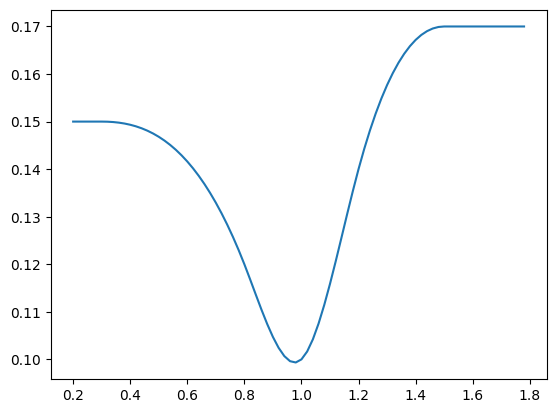

ATM strike :  1.0 , ATM Vol :  0.1


In [18]:
if __name__ == "__main__":    
    testSmile()

# <a id = "p7">7.</a>  <font color = "green"> Implied Volatility Surface </font>  [back to table of contents](#top)

In [19]:
class ImpliedVol:
    def __init__(self, ts, smiles):
        self.ts = ts
        self.smiles = smiles
    # linear interpolation in variance, along the strike line
    def Vol(self, t, k):
        # locate the interval t is in
        pos = bisect.bisect_left(self.ts, t)
        # if t is on or in front of first pillar,
        if pos == 0:
            return self.smiles[0].Vol(k)
        if pos >= len(self.ts):
            return self.smiles[-1].Vol(k)
        else:  # in between two brackets
            prevVol, prevT = self.smiles[pos-1].Vol(k), self.ts[pos-1]
            nextVol, nextT = self.smiles[pos].Vol(k), self.ts[pos]
            w = (nextT - t) / (nextT - prevT)
            prevVar = prevVol * prevVol * prevT
            nextVar = nextVol * nextVol * nextT
            return  math.sqrt((w * prevVar + (1-w) * nextVar)/t)
        return

    def dVoldK(self, t, k):
        return (self.Vol(t, k+0.01) - self.Vol(t, k-0.01)) / 0.02
    def dVoldT(self, t, k):
        return (self.Vol(t+0.005, k) - self.Vol(t, k)) / 0.005
    def dVol2dK2(self, t, k):
        return (self.Vol(t, k+0.01) + self.Vol(t, k-0.01) - 2*self.Vol(t, k)) / 0.0001

In [20]:
def fwdDelta(fwd, stdev, strike, payoffType):
    d1 = math.log(fwd / strike) / stdev + stdev / 2
    if payoffType == PayoffType.Call:
        return cnorm(d1)
    elif payoffType == PayoffType.Put:
        return - cnorm(-d1)
    else:
        raise Exception("not supported payoff type", payoffType)

In [21]:
# solve for the K such that Delta(S, T, K, vol) = delta
def strikeFromDelta(S, r, q, T, vol, delta, payoffType):
    fwd = S * math.exp((r-q) * T)
    if payoffType == PayoffType.Put:
        delta = -delta
    f = lambda K: (fwdDelta(fwd, vol * math.sqrt(T), K, payoffType) - delta)
    a, b = 0.0001, 10000
    return optimize.brentq(f, a, b)

In [22]:
def smileFromMarks(T, S, r, q, atmvol, bf25, rr25, bf10, rr10):
    c25 = bf25 + atmvol + rr25/2
    p25 = bf25 + atmvol - rr25/2
    c10 = bf10 + atmvol + rr10/2
    p10 = bf10 + atmvol - rr10/2

    ks = [ strikeFromDelta(S, r, q, T, p10, 0.1, PayoffType.Put),
           strikeFromDelta(S, r, q, T, p25, 0.25, PayoffType.Put),
           S * math.exp((r-q)*T),
           strikeFromDelta(S, r, q, T, c25, 0.25, PayoffType.Call),
           strikeFromDelta(S, r, q, T, c10, 0.1, PayoffType.Call) ]
    # print(T, ks)
    return Smile(ks, [p10, p25, atmvol, c25, c10])

In [23]:
def createTestImpliedVol(S, r, q, sc):
    pillars = [0.02, 0.04, 0.06, 0.08, 0.16, 0.25, 0.75, 1.0, 1.5, 2, 3, 5]
    atmvols = [0.155, 0.1395, 0.1304, 0.1280, 0.1230, 0.1230, 0.1265, 0.1290, 0.1313, 0.1318, 0.1313, 0.1305, 0.1295]
    bf25s = [0.0016, 0.0016, 0.0021, 0.0028, 0.0034, 0.0043, 0.0055, 0.0058, 0.0060, 0.0055, 0.0054, 0.0050, 0.0045, 0.0043]
    rr25s = [-0.0065, -0.0110, -0.0143, -0.0180, -0.0238, -0.0288, -0.0331, -0.0344, -0.0349, -0.0340, -0.0335, -0.0330, -0.0330]
    bf10s = [0.0050, 0.0050, 0.0067, 0.0088, 0.0111, 0.0144, 0.0190, 0.0201, 0.0204, 0.0190, 0.0186, 0.0172, 0.0155, 0.0148]
    rr10s = [-0.0111, -0.0187, -0.0248, -0.0315, -0.0439, -0.0518, -0.0627, -0.0652, -0.0662, -0.0646, -0.0636, -0.0627, -0.0627]
    smiles = [smileFromMarks(pillars[i], S, r, q, atmvols[i], bf25s[i]*sc, rr25s[i]*sc, bf10s[i]*sc, rr10s[i]*sc) for i in range(len(pillars))]
    return ImpliedVol(pillars, smiles)

In [24]:
def plotTestImpliedVolSurface():
    S, r, q , sc = 1.25805, 0.01, 0.003, 0.2
    iv = createTestImpliedVol(S, r, q, sc)
    tStart, tEnd = 0.02, 3
    ts = np.arange(tStart, tEnd, 0.02)
    fwdEnd = S*math.exp((r-q)*tEnd)
    kmin = strikeFromDelta(S, r, q, tEnd, iv.Vol(tEnd, fwdEnd), 0.05, PayoffType.Put)
    kmax = strikeFromDelta(S, r, q, tEnd, iv.Vol(tEnd, fwdEnd), 0.05, PayoffType.Call)
    ks = np.arange(kmin, kmax, 0.01)

    vs = np.ndarray((len(ts), len(ks)))
    for i in range(len(ts)):
        for j in range(len(ks)):
            vs[i, j] = iv.Vol(ts[i], ks[j])
    hf = plt.figure()
    ha = hf.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(ks, ts)
    ha.plot_surface(X, Y, vs)
    plt.show()
    
    #plot two smiles in one graph
    index1 = int(len(ts)/10) 
    index2 = int(len(ts)-1) 
    y = vs[index1, ]
    z = vs[index2, ]
     
    plt.plot(ks, y, color='r', label=ts[index1]) 
    plt.plot(ks, z, color='g', label=ts[index2]) 
    
    # Naming the x-axis, y-axis and the whole graph 
    plt.xlabel("Implied Vols") 
    plt.ylabel("Strikes") 
    plt.title("Two Smiles") 

    plt.legend() 
    
    # To load the display window 
    plt.show()

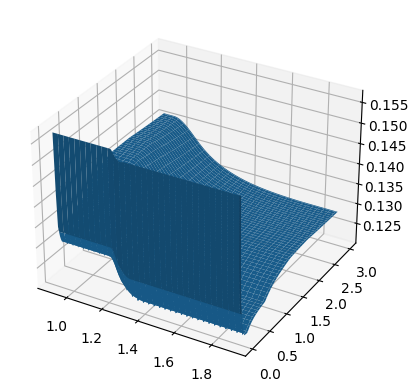

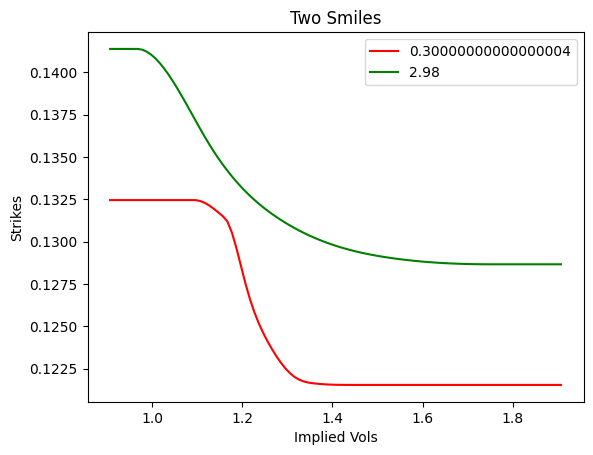

In [25]:
if __name__ == "__main__":   
    plotTestImpliedVolSurface()